# Agglomerative Clustering for Item 

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.feature_extraction import FeatureHasher
from kmodes.kprototypes import KPrototypes
import plotly.express as px


In [ ]:
item = pd.read_csv(
    '../../datasets/ml-100k/u.item',
    sep='|',
    encoding='latin-1', 
    names=[
        'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_url',
        'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
    ]
)
item = item.drop(columns='IMDb_url')
item = item.drop(columns='video_release_date')

print(item.head())


   movie_id              title  unknown  Action  Adventure  Animation  \
0         1   Toy Story (1995)        0       0          0          1   
1         2   GoldenEye (1995)        0       1          1          0   
2         3  Four Rooms (1995)        0       0          0          0   
3         4  Get Shorty (1995)        0       1          0          0   
4         5     Copycat (1995)        0       0          0          0   

   Children's  Comedy  Crime  Documentary  ...  Fantasy  Film-Noir  Horror  \
0           1       1      0            0  ...        0          0       0   
1           0       0      0            0  ...        0          0       0   
2           0       0      0            0  ...        0          0       0   
3           0       1      0            0  ...        0          0       0   
4           0       0      1            0  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0 


--- Metrica: jaccard ---


d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\sklearn\metrics\pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


k=2, silhouette score=0.1811
k=3, silhouette score=0.2088
k=4, silhouette score=0.2208
k=5, silhouette score=0.2144
k=6, silhouette score=0.3189
k=7, silhouette score=0.3263
k=8, silhouette score=0.4106
k=9, silhouette score=0.4239
k=10, silhouette score=0.4261

--- Metrica: dice ---


d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\sklearn\metrics\pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


k=2, silhouette score=0.2246
k=3, silhouette score=0.2527
k=4, silhouette score=0.2464
k=5, silhouette score=0.3014
k=6, silhouette score=0.2998
k=7, silhouette score=0.3162
k=8, silhouette score=0.3166
k=9, silhouette score=0.3007
k=10, silhouette score=0.4662

--- Metrica: hamming ---
k=2, silhouette score=0.5008
k=3, silhouette score=0.4392
k=4, silhouette score=0.4167
k=5, silhouette score=0.3989
k=6, silhouette score=0.3641
k=7, silhouette score=0.2846
k=8, silhouette score=0.2108
k=9, silhouette score=0.2134
k=10, silhouette score=0.2150

--- Metrica: rogerstanimoto ---


d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\sklearn\metrics\pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


k=2, silhouette score=0.4662
k=3, silhouette score=0.4381
k=4, silhouette score=0.3859
k=5, silhouette score=0.3545
k=6, silhouette score=0.2942
k=7, silhouette score=0.2717
k=8, silhouette score=0.2669
k=9, silhouette score=0.2120
k=10, silhouette score=0.2151


d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\sklearn\metrics\pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)



--- Metrica: sokalmichener ---
k=2, silhouette score=0.4662
k=3, silhouette score=0.4381
k=4, silhouette score=0.3859
k=5, silhouette score=0.3545
k=6, silhouette score=0.2942
k=7, silhouette score=0.2717
k=8, silhouette score=0.2669
k=9, silhouette score=0.2120
k=10, silhouette score=0.2151


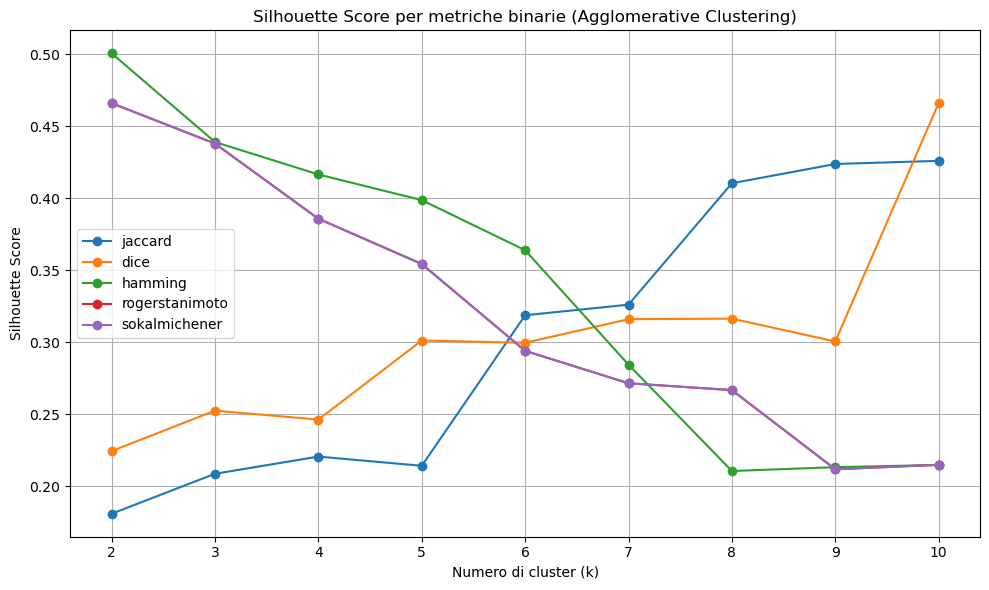

In [ ]:
from sklearn.metrics import pairwise_distances, silhouette_score
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering


# Seleziona le feature binarie dei generi
generi = [
    'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]


# Matrice binaria
X_bin = item[generi].astype(int).values

# Metriche binarie da testare
metriche = ['jaccard', 'dice', 'hamming', 'rogerstanimoto', 'sokalmichener']

# Valori di k da provare
K = range(2, 11)

# Dizionario per memorizzare i risultati
risultati = {}

for metrica in metriche:
    silhouette_scores = []
    
    # Calcola matrice di distanza una sola volta per la metrica corrente
    dist = pairwise_distances(X_bin, metric=metrica)

    print(f"\n Metrica: {metrica} ---")
    
    for k in K:
        model = AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='average')
        labels = model.fit_predict(dist)
        
        try:
            score = silhouette_score(dist, labels, metric='precomputed')
        except:
            score = np.nan  # In caso il cluster abbia un solo elemento
        
        print(f"k={k}, silhouette score={score:.4f}")
        silhouette_scores.append(score)
    
    risultati[metrica] = silhouette_scores

# Plot dei risultati
plt.figure(figsize=(10, 6))
for metrica, scores in risultati.items():
    plt.plot(K, scores, label=metrica, marker='o')
    
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per metriche binarie (Agglomerative Clustering)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Trova la combinazione (metrica, k) con il miglior silhouette score

best_metric = None
best_k = None
best_score = -1

for metrica, scores in risultati.items():
    for i, score in enumerate(scores):
        if not np.isnan(score) and score > best_score:
            best_score = score
            best_metric = metrica
            best_k = K[i]

print(f"\n Miglior combinazione trovata:")
print(f"Metrica: {best_metric}")
print(f"Numero di cluster (k): {best_k}")
print(f"Silhouette Score: {best_score:.4f}")



 Miglior combinazione trovata:
Metrica: hamming
Numero di cluster (k): 2
Silhouette Score: 0.5008


In [ ]:
# Calcola matrice di distanza con la metrica migliore

dist = pairwise_distances(item[generi].astype(int).values, metric=best_metric)

# Clustering finale con il k migliore e matrice di distanza

final_model = AgglomerativeClustering(n_clusters=best_k, metric='precomputed', linkage='average')
item['cluster_agglomerative'] = final_model.fit_predict(dist)

d:\Download\Miniconda\Anaconda\envs\FDSML\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


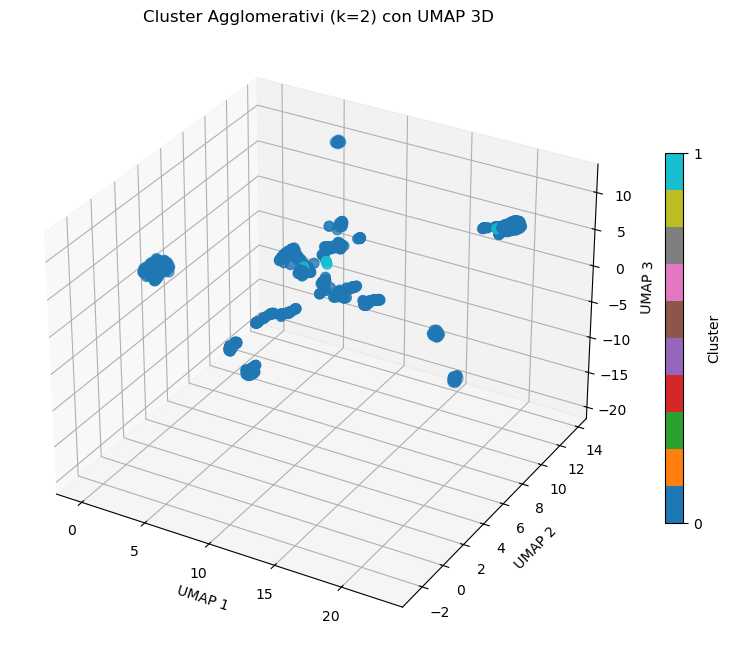

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

try:
    import umap

    reducer = umap.UMAP(n_components=3, random_state=42)
    embedding = reducer.fit_transform(X_bin)

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    unique_clusters = np.unique(item['cluster_agglomerative'])
    scatter = ax.scatter(
        embedding[:,0], embedding[:,1], embedding[:,2],
        c=item['cluster_agglomerative'], cmap='tab10', s=50
    )

    ax.set_title(f'Cluster Agglomerativi (k={best_k}) con UMAP 3D')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')

    # Colorbar con solo i cluster effettivi
    cbar = fig.colorbar(scatter, ticks=unique_clusters, shrink=0.6)
    cbar.set_label('Cluster')
    cbar.set_ticks(unique_clusters)
    cbar.set_ticklabels(unique_clusters)

    plt.show()

except ImportError:
    print("UMAP non installato. Salta visualizzazione 3D.")
